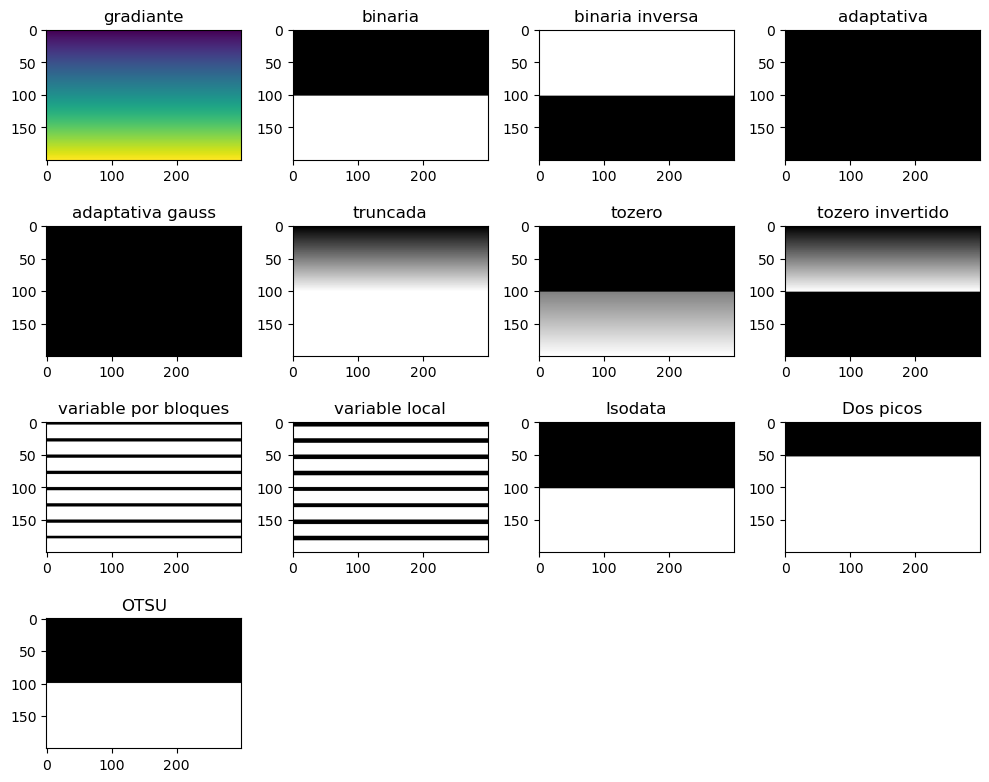

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


width = 300
height = 200


desgradado = Image.new("L", (width, height))


for y in range(height):
    for x in range(width):
    
        gray_value = int(255 * y / height)
        desgradado.putpixel((x, y), gray_value)


convertido = np.array(desgradado)

plt.figure(figsize=(10,8))
plt.subplot(4, 4, 1)
plt.title('gradiante')
plt.imshow(desgradado)

def binaria(img):
    _, umbralbi = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    plt.subplot(4, 4, 2)
    plt.imshow(umbralbi, cmap='gray')
    plt.title('binaria') 

def binaria_inversa(img):
    _, Umbral_inve_bi = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    plt.subplot(4, 4, 3)
    plt.imshow(Umbral_inve_bi, cmap='gray')
    plt.title('binaria inversa') 

def adaptativa(img):
    umb_adap = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,2)
    plt.subplot(4, 4, 4)
    plt.imshow(umb_adap, cmap='gray')
    plt.title('adaptativa') 


def adaptativa_gauss(img):
    umb_adap_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    plt.subplot(4, 4, 5)
    plt.imshow(umb_adap_gauss, cmap='gray')
    plt.title('adaptativa gauss') 

def truncada(img):
    _, umb_trunc = cv2.threshold(img, 127, 200, cv2.THRESH_TRUNC)
    plt.subplot(4, 4, 6)
    plt.imshow(umb_trunc, cmap='gray')
    plt.title('truncada') 

def tozero(img):
    _, umb_tozero = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
    plt.subplot(4, 4, 7)
    plt.imshow(umb_tozero, cmap='gray')
    plt.title('tozero')

def tozero_invertido(img):
    _, umb_tozero_inv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
    plt.subplot(4, 4, 8)
    plt.imshow(umb_tozero_inv, cmap='gray')
    plt.title('tozero invertido')

def variable_bloques(image, block_size, c):

    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            threshold = block_mean - c
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    
    plt.subplot(4, 4, 9)
    plt.imshow(threshold_image, cmap='gray')
    plt.title('variable por bloques')

def variable_local(image, block_size, threshold_offset):
    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            block_std = np.std(block)
            threshold = block_mean - (threshold_offset * block_std)
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    
    plt.subplot(4, 4, 10)
    plt.imshow(threshold_image, cmap='gray')
    plt.title('variable local')

# Función que aplica la umbralización global con el algoritmo de Isodata
def isodata(image):
    # Umbral inicial decidimos del espectro de 0 a 255
    threshold = 128
    
    while True:
        # Se divide la imagen en dos grupos según el umbral
        
        groupo1 = image[image <= threshold] # grupo donde el umbral es menor o igual al determinado
        groupo2 = image[image > threshold] # grupo donde el umbral es mayor al determinado
        
        # Se calcula la media de cada grupo
        media1 = np.mean(groupo1)
        media2 = np.mean(groupo2)
        
        # Nuevo umbral
        nuevo_umbral = (media1 + media2) / 2 # segun formula 
        
        # Si el nuevo umbral es igual al umbral anterior, se detiene el bucle
        if abs(nuevo_umbral - threshold) < 0.5:
            break
        
        threshold = nuevo_umbral
        # Umbralización de la imagen
    _, imagen_umbralizada = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY) #OJO el "_" es una variable pero que ignoramos (almacena el valor del umbral) 
    plt.subplot(4, 4, 11)
    plt.imshow(imagen_umbralizada, cmap='gray')
    plt.title('Isodata')


def dos_picos(image):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([image],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)
    
    _, imagen_umbralizada = cv2.threshold(image, umbral, 255, cv2.THRESH_BINARY) 
    plt.subplot(4, 4, 12)
    plt.imshow(imagen_umbralizada, cmap='gray')
    plt.title('Dos picos')

def otsu(img):
    _, otsu = cv2.threshold(img, 127, 255, cv2.THRESH_OTSU)
    plt.subplot(4, 4, 13)
    plt.imshow(otsu, cmap='gray')
    plt.title('OTSU')

    
binaria(convertido)
binaria_inversa(convertido)
adaptativa(convertido)  
adaptativa_gauss(convertido)  
truncada(convertido)  
tozero(convertido)  
tozero_invertido(convertido)
variable_bloques(convertido, 25, 10)
variable_local(convertido, 25, 0.8)
isodata(convertido)
dos_picos(convertido)
otsu(convertido)




plt.tight_layout()
plt.show() 



